In [1]:
# 📌 Environment Setup & Imports
import os
import pandas as pd
import numpy as np
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns

# 🔐 Set Up Google Cloud Authentication
CREDENTIALS_PATH = r"C:\Users\eddie\OneDrive\code\magician\config\cloud_credentials.json"
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = CREDENTIALS_PATH

# 🌐 Initialize BigQuery Client
client = bigquery.Client()

# ✅ Verification Step
print("✅ Notebook initialized and BigQuery authentication successful!")


✅ Notebook initialized and BigQuery authentication successful!


In [2]:
%run scripts/technical_analysis/setup_indicators.py
df_indicators = load_indicators()
print("✅ Indicators Loaded!")
df_indicators.head()


✅ Loaded indicators from local storage!
  asset                 timestamp  open_price  high_price  low_price  \
0  AAVE 2024-08-05 11:00:00+00:00        80.0       80.62      78.18   
1  AAVE 2024-08-07 09:00:00+00:00       104.0      104.19     101.69   
2  AAVE 2024-08-14 12:00:00+00:00       104.0      104.73     102.65   
3  AAVE 2024-08-01 15:00:00+00:00       112.0      112.39     109.66   
4  AAVE 2024-08-02 08:00:00+00:00       116.0      116.58     115.68   

   close_price    volume      ema_20      ema_50     rsi_14  bollinger_mid  \
0        78.87  2585.504   89.522695   98.016651  21.614301        90.8800   
1       102.12  1458.836  102.280057  100.482508  54.284369       103.0685   
2       103.07  3510.711   98.817349   97.088984  75.546720        98.2985   
3       111.31  8194.624  109.323685  107.603114  63.674197       108.4230   
4       115.82   350.448  113.751970  110.787157  67.105957       113.7440   

   bollinger_std  bollinger_upper  bollinger_lower      ma

,asset,timestamp,open_price,high_price,low_price,close_price,volume,ema_20,ema_50,rsi_14,bollinger_mid,bollinger_std,bollinger_upper,bollinger_lower,macd,macd_signal,mfi_14,z_score,atr_14
0,AAVE,2024-08-05 11:00:00+00:00,80.0,80.62,78.18,78.87,2585.504,89.522695,98.016651,21.614301,90.8800,8.708190,108.296381,73.463619,-6.530667,-5.788412,12.778142,-1.379161,4.092857
1,AAVE,2024-08-07 09:00:00+00:00,104.0,104.19,101.69,102.12,1458.836,102.280057,100.482508,54.284369,103.0685,1.698561,106.465621,99.671379,1.152598,1.564222,64.183280,-0.558414,2.502857
2,AAVE,2024-08-14 12:00:00+00:00,104.0,104.73,102.65,103.07,3510.711,98.817349,97.088984,75.546720,98.2985,2.120068,102.538635,94.058365,1.535746,0.938368,88.516382,2.250636,1.380000
3,AAVE,2024-08-01 15:00:00+00:00,112.0,112.39,109.66,111.31,8194.624,109.323685,107.603114,63.674197,108.4230,3.088587,114.600174,102.245826,1.463458,0.869921,55.800849,0.934732,2.290714
4,AAVE,2024-08-02 08:00:00+00:00,116.0,116.58,115.68,115.82,350.448,113.751970,110.787157,67.105957,113.7440,3.090448,119.924896,107.563104,1.970145,1.914253,31.057921,0.671747,1.970714


In [3]:
# Check dataset structure
df_indicators.info()

# Quick preview
df_indicators.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4242 entries, 0 to 4241
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   asset            4242 non-null   object             
 1   timestamp        4242 non-null   datetime64[us, UTC]
 2   open_price       4242 non-null   float64            
 3   high_price       4242 non-null   float64            
 4   low_price        4242 non-null   float64            
 5   close_price      4242 non-null   float64            
 6   volume           4242 non-null   float64            
 7   ema_20           4242 non-null   float64            
 8   ema_50           4242 non-null   float64            
 9   rsi_14           4242 non-null   float64            
 10  bollinger_mid    4242 non-null   float64            
 11  bollinger_std    4242 non-null   float64            
 12  bollinger_upper  4242 non-null   float64            
 13  bollinger_lower  4

,asset,timestamp,open_price,high_price,low_price,close_price,volume,ema_20,ema_50,rsi_14,bollinger_mid,bollinger_std,bollinger_upper,bollinger_lower,macd,macd_signal,mfi_14,z_score,atr_14
0,AAVE,2024-08-05 11:00:00+00:00,80.0,80.62,78.18,78.87,2585.504,89.522695,98.016651,21.614301,90.8800,8.708190,108.296381,73.463619,-6.530667,-5.788412,12.778142,-1.379161,4.092857
1,AAVE,2024-08-07 09:00:00+00:00,104.0,104.19,101.69,102.12,1458.836,102.280057,100.482508,54.284369,103.0685,1.698561,106.465621,99.671379,1.152598,1.564222,64.183280,-0.558414,2.502857
2,AAVE,2024-08-14 12:00:00+00:00,104.0,104.73,102.65,103.07,3510.711,98.817349,97.088984,75.546720,98.2985,2.120068,102.538635,94.058365,1.535746,0.938368,88.516382,2.250636,1.380000
3,AAVE,2024-08-01 15:00:00+00:00,112.0,112.39,109.66,111.31,8194.624,109.323685,107.603114,63.674197,108.4230,3.088587,114.600174,102.245826,1.463458,0.869921,55.800849,0.934732,2.290714
4,AAVE,2024-08-02 08:00:00+00:00,116.0,116.58,115.68,115.82,350.448,113.751970,110.787157,67.105957,113.7440,3.090448,119.924896,107.563104,1.970145,1.914253,31.057921,0.671747,1.970714


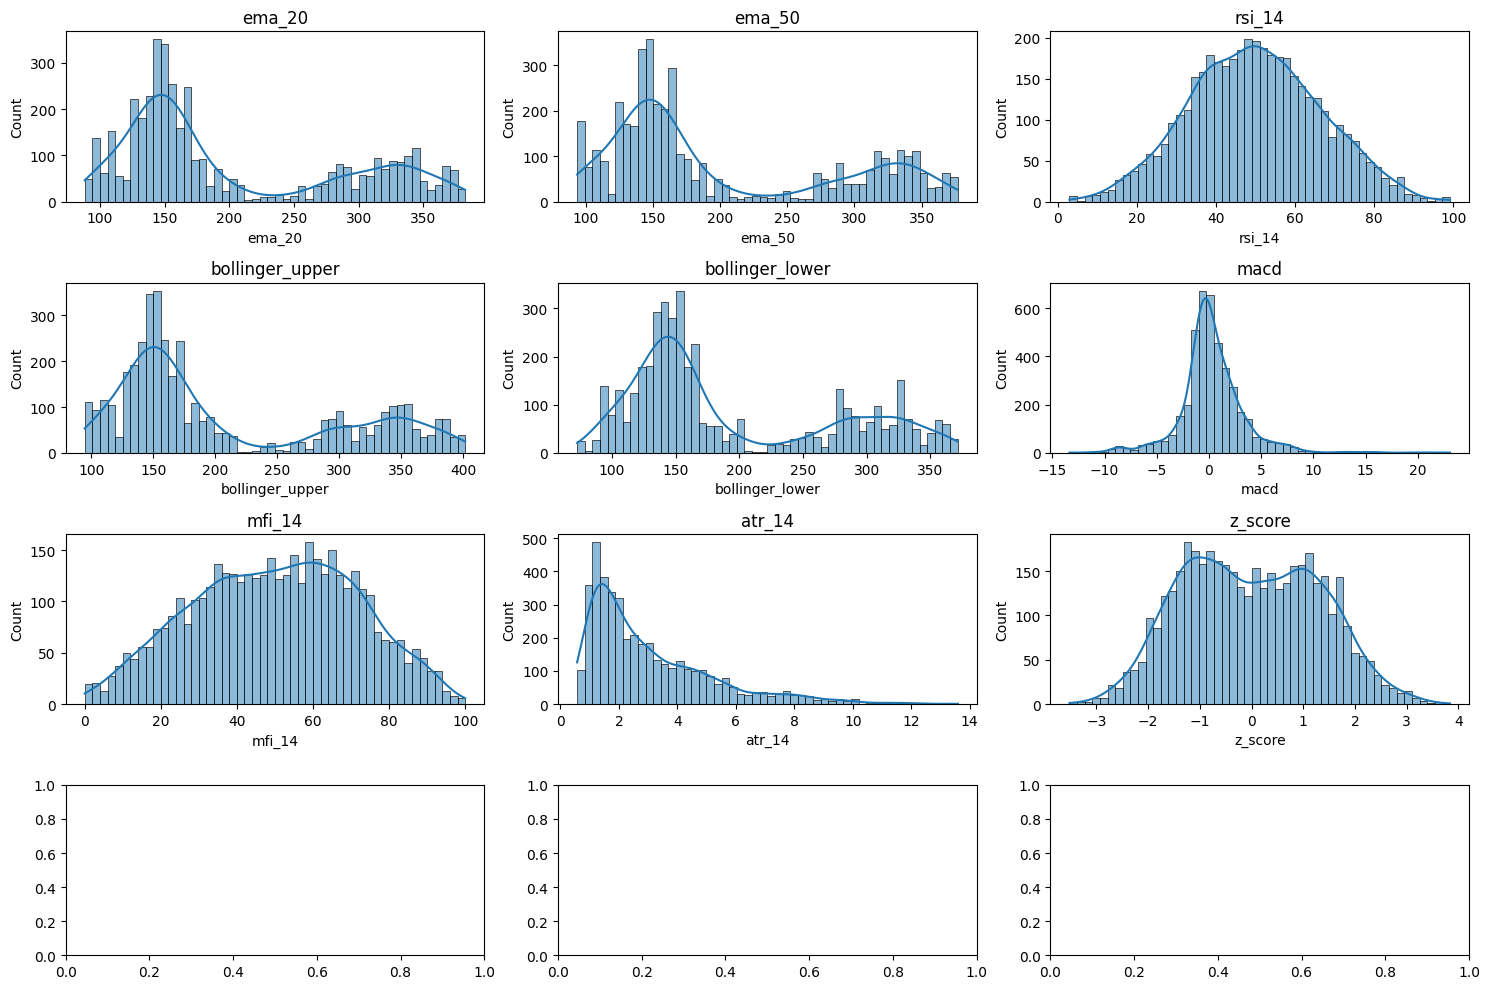

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define key indicators to check
indicators_to_check = ["ema_20", "ema_50", "rsi_14", "bollinger_upper", "bollinger_lower", "macd", "mfi_14", "atr_14", "z_score"]

# Create subplots
fig, axes = plt.subplots(len(indicators_to_check)//3 + 1, 3, figsize=(15, 10))
axes = axes.flatten()

# Plot histograms
for i, indicator in enumerate(indicators_to_check):
    if indicator in df_indicators.columns:
        sns.histplot(df_indicators[indicator].dropna(), bins=50, kde=True, ax=axes[i])
        axes[i].set_title(indicator)

plt.tight_layout()
plt.show()


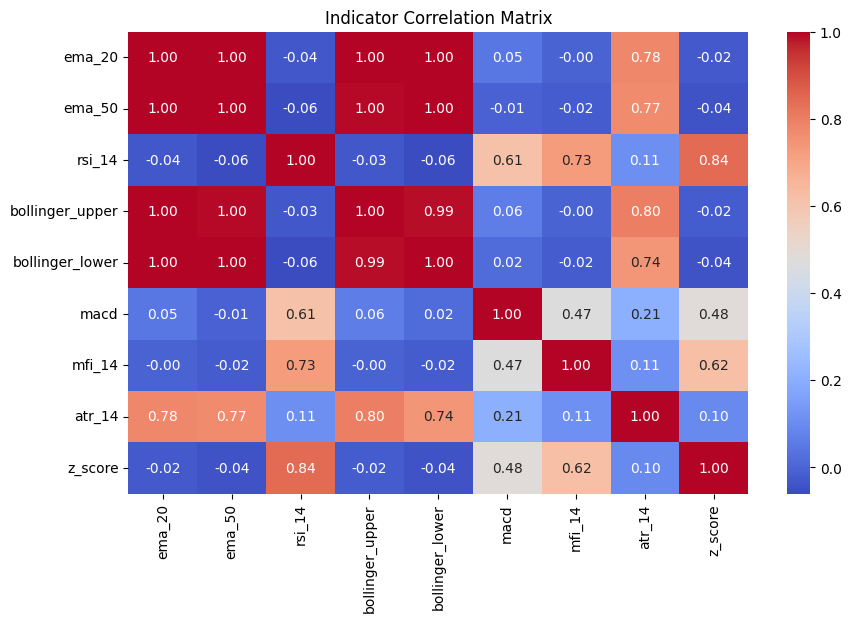

In [5]:
# Compute correlation matrix
correlation_matrix = df_indicators[indicators_to_check].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Indicator Correlation Matrix")
plt.show()


In [6]:
# Define volatility threshold
high_volatility = df_indicators["atr_14"] > df_indicators["atr_14"].quantile(0.75)
low_volatility = df_indicators["atr_14"] < df_indicators["atr_14"].quantile(0.25)

# Add labels
df_indicators["volatility_regime"] = "medium"
df_indicators.loc[high_volatility, "volatility_regime"] = "high"
df_indicators.loc[low_volatility, "volatility_regime"] = "low"

# Check distribution
df_indicators["volatility_regime"].value_counts()


volatility_regime
medium    2120
high      1061
low       1061
Name: count, dtype: int64

In [7]:
# Check column names to confirm all indicators are there
print(df_indicators.columns)

# Quick preview
df_indicators.head()


Index(['asset', 'timestamp', 'open_price', 'high_price', 'low_price',
       'close_price', 'volume', 'ema_20', 'ema_50', 'rsi_14', 'bollinger_mid',
       'bollinger_std', 'bollinger_upper', 'bollinger_lower', 'macd',
       'macd_signal', 'mfi_14', 'z_score', 'atr_14', 'volatility_regime'],
      dtype='object')


,asset,timestamp,open_price,high_price,low_price,close_price,volume,ema_20,ema_50,rsi_14,bollinger_mid,bollinger_std,bollinger_upper,bollinger_lower,macd,macd_signal,mfi_14,z_score,atr_14,volatility_regime
0,AAVE,2024-08-05 11:00:00+00:00,80.0,80.62,78.18,78.87,2585.504,89.522695,98.016651,21.614301,90.8800,8.708190,108.296381,73.463619,-6.530667,-5.788412,12.778142,-1.379161,4.092857,high
1,AAVE,2024-08-07 09:00:00+00:00,104.0,104.19,101.69,102.12,1458.836,102.280057,100.482508,54.284369,103.0685,1.698561,106.465621,99.671379,1.152598,1.564222,64.183280,-0.558414,2.502857,medium
2,AAVE,2024-08-14 12:00:00+00:00,104.0,104.73,102.65,103.07,3510.711,98.817349,97.088984,75.546720,98.2985,2.120068,102.538635,94.058365,1.535746,0.938368,88.516382,2.250636,1.380000,low
3,AAVE,2024-08-01 15:00:00+00:00,112.0,112.39,109.66,111.31,8194.624,109.323685,107.603114,63.674197,108.4230,3.088587,114.600174,102.245826,1.463458,0.869921,55.800849,0.934732,2.290714,medium
4,AAVE,2024-08-02 08:00:00+00:00,116.0,116.58,115.68,115.82,350.448,113.751970,110.787157,67.105957,113.7440,3.090448,119.924896,107.563104,1.970145,1.914253,31.057921,0.671747,1.970714,medium


In [8]:
%pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [9]:
from statsmodels.tsa.stattools import adfuller

# Function to check stationarity
def check_stationarity(series):
    result = adfuller(series.dropna())
    return {"Test Statistic": result[0], "P-Value": result[1], "Stationary": result[1] < 0.05}

# Check stationarity for key indicators
stationarity_results = {col: check_stationarity(df_indicators[col]) for col in ["ema_20", "ema_50", "rsi_14", "macd", "atr_14"]}

# Convert results to DataFrame
pd.DataFrame(stationarity_results).T


,Test Statistic,P-Value,Stationary
ema_20,-19.207629,0.0,True
ema_50,-19.141345,0.0,True
rsi_14,-63.887009,0.0,True
macd,-64.870916,0.0,True
atr_14,-20.427514,0.0,True


In [10]:
import pandas as pd

# Try loading from a local file first (for speed)
try:
    df_indicators = pd.read_parquet("technical_indicators.parquet")
    print("✅ Loaded indicators from local storage!")
except FileNotFoundError:
    print("⚠️ Local file not found, querying BigQuery instead.")
    %run scripts/technical_analysis/setup_indicators.py  # Reload from BigQuery
    df_indicators = pd.read_parquet("technical_indicators.parquet")  # Save for future use


✅ Loaded indicators from local storage!


In [11]:
import numpy as np

# Select only numeric columns for computation
numeric_cols = df_indicators.select_dtypes(include=[np.number]).columns  

# Define high and low volatility conditions  
high_volatility = df_indicators["atr_14"] > df_indicators["atr_14"].quantile(0.75)  
low_volatility = df_indicators["atr_14"] < df_indicators["atr_14"].quantile(0.25)  

# Compute average values in each regime, only for numeric columns  
high_vol_stats = df_indicators.loc[high_volatility, numeric_cols].mean()  
low_vol_stats = df_indicators.loc[low_volatility, numeric_cols].mean()  

# Compare results  
print("📊 High Volatility Stats:\n", high_vol_stats)  
print("📉 Low Volatility Stats:\n", low_vol_stats)  


📊 High Volatility Stats:
 open_price          311.368718
high_price          313.952083
low_price           308.995240
close_price         311.455259
volume             2313.360777
ema_20              310.161488
ema_50              308.530860
rsi_14               51.099003
bollinger_mid       310.066838
bollinger_std         8.083542
bollinger_upper     326.233921
bollinger_lower     293.899755
macd                  0.899750
macd_signal           0.836842
mfi_14               51.464738
z_score               0.089124
atr_14                6.120844
dtype: float64
📉 Low Volatility Stats:
 open_price         136.102205
high_price         136.579576
low_price          135.672205
close_price        136.111461
volume             758.539948
ema_20             136.468744
ema_50             136.660281
rsi_14              46.025387
bollinger_mid      136.549595
bollinger_std        1.489531
bollinger_upper    139.528658
bollinger_lower    133.570533
macd                -0.209312
macd_signal      

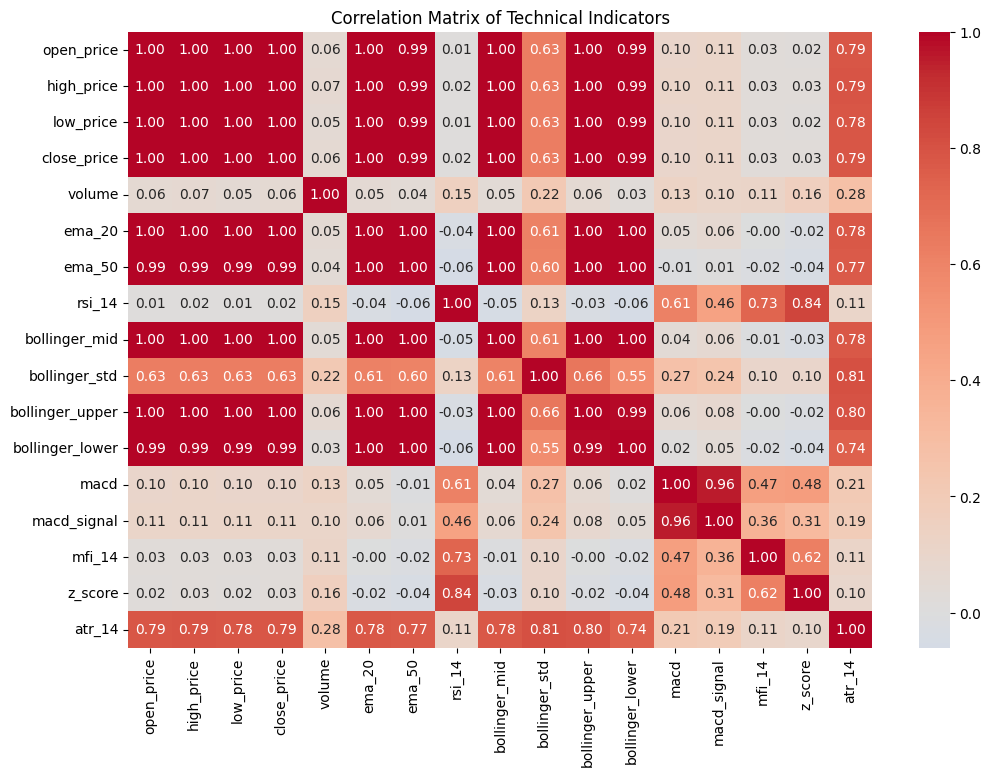

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric indicators
correlation_matrix = df_indicators[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Technical Indicators")
plt.show()


In [13]:
# Define uptrend & downtrend based on Moving Averages
df_indicators["uptrend"] = df_indicators["ema_20"] > df_indicators["ema_50"]

# Compute average indicator values for uptrend vs. downtrend
trend_stats = df_indicators.groupby("uptrend")[numeric_cols].mean()
print("📈 Uptrend vs. 📉 Downtrend Indicator Averages:\n", trend_stats)


📈 Uptrend vs. 📉 Downtrend Indicator Averages:
          open_price  high_price   low_price  close_price       volume  \
uptrend                                                                 
False    196.738639  197.888504  195.586067   196.731605  1356.812819   
True     205.543658  206.919034  204.335233   205.621932  1804.364025   

             ema_20      ema_50     rsi_14  bollinger_mid  bollinger_std  \
uptrend                                                                    
False    198.699826  201.596536  43.317369     198.672815       3.746048   
True     203.059278  199.159162  55.816008     203.084748       4.227810   

         bollinger_upper  bollinger_lower      macd  macd_signal     mfi_14  \
uptrend                                                                       
False         206.164911       191.180718 -1.666777    -1.678464  43.000586   
True          211.540367       194.629129  2.085677     2.098371  56.267196   

          z_score    atr_14  
uptrend 

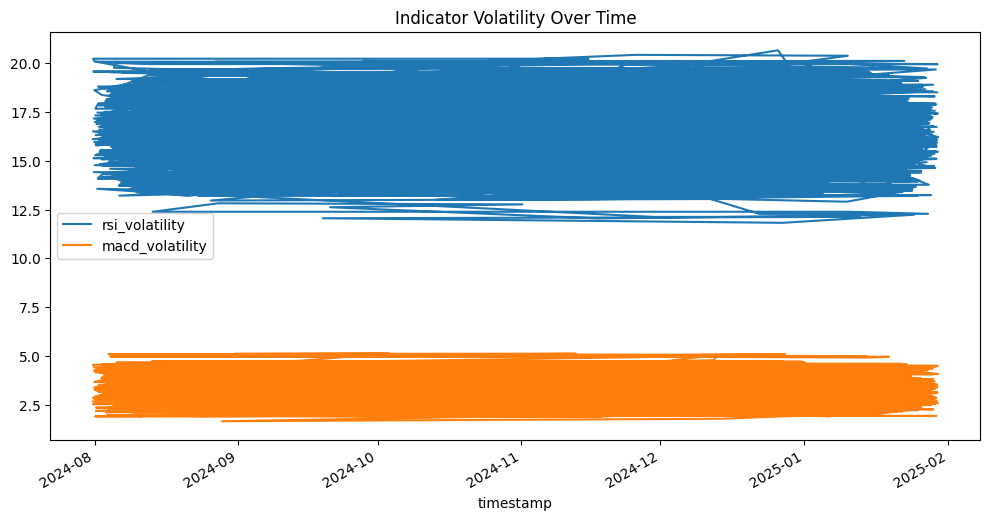

In [14]:
# Compute rolling standard deviation for a few indicators
df_indicators["rsi_volatility"] = df_indicators["rsi_14"].rolling(50).std()
df_indicators["macd_volatility"] = df_indicators["macd"].rolling(50).std()

# Plot volatility trends
df_indicators[["timestamp", "rsi_volatility", "macd_volatility"]].set_index("timestamp").plot(figsize=(12, 6))
plt.title("Indicator Volatility Over Time")
plt.show()


🔍 Unique assets count: 1
['AAVE']
asset
AAVE    4242
Name: count, dtype: int64
🔍 Unique assets found: 1
  Asset  Overbought  Oversold
0  AAVE         352       397
['AAVE']


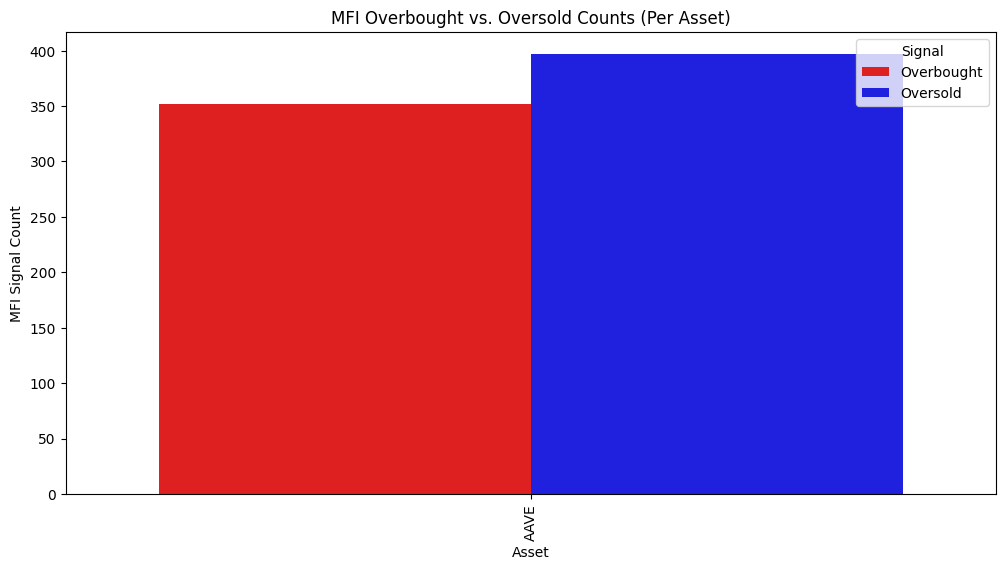

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print(f"🔍 Unique assets count: {df_indicators['asset'].nunique()}")
print(df_indicators['asset'].unique())  # Shows all asset names
print(df_indicators['asset'].value_counts())




# 🔍 Recalculate MFI signals per asset
df_indicators["mfi_overbought"] = df_indicators["mfi_14"] > 80
df_indicators["mfi_oversold"] = df_indicators["mfi_14"] < 20

# 🏆 Group by asset, ensuring all assets are included
mfi_overbought_counts = df_indicators.groupby("asset")["mfi_overbought"].sum().reset_index()
mfi_oversold_counts = df_indicators.groupby("asset")["mfi_oversold"].sum().reset_index()

# 📝 Merge Overbought & Oversold Counts
mfi_counts = pd.merge(mfi_overbought_counts, mfi_oversold_counts, on="asset", how="outer")
mfi_counts.columns = ["Asset", "Overbought", "Oversold"]

# ✅ Debugging - Check if multiple assets exist
print(f"🔍 Unique assets found: {mfi_counts['Asset'].nunique()}")  
print(mfi_counts.head())  # Quick preview
print(df_indicators["asset"].unique())  # Should list multiple asset names

# 🔄 Reshape for Seaborn compatibility
mfi_counts = mfi_counts.melt(id_vars=["Asset"], var_name="Signal", value_name="Count")

# 📊 Sort by total count (Overbought + Oversold)
mfi_counts["Total"] = mfi_counts.groupby("Asset")["Count"].transform("sum")
mfi_counts = mfi_counts.sort_values(by="Total", ascending=False)

# 🎨 Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=mfi_counts, x="Asset", y="Count", hue="Signal", palette={"Overbought": "red", "Oversold": "blue"})

plt.xticks(rotation=90)
plt.xlabel("Asset")
plt.ylabel("MFI Signal Count")
plt.title("MFI Overbought vs. Oversold Counts (Per Asset)")  # Removed emoji for font compatibility
plt.legend(title="Signal")
plt.show()
